In [1]:
#Product size recommendation and fit prediction are critical in order to improve customers’ shopping experiences and to 
#reduce product return rates. However, modeling customers’ fit feedback is challenging due to its subtle semantics, 
#arising from the subjective evaluation of products and imbalanced label distribution (most of the feedbacks are "Fit").
#As a data scientist our aim is to predict the customer satisfaction. The dataset contain imformation regarding clothes. 
#Each observation is different fitting size with various features.


In [2]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
# path for the location of the data
path = 'https://storage.googleapis.com/ga-codeblock-live-prod-live-data/account/b62/2a7f53f8-19f6-45c7-9d74-560da9338b1a/b34/a75ad91e-403c-4780-a385-af143204efe5/file.json'

In [4]:
# loading the data using pandas read json function
df = pd.read_json(path_or_buf = path, lines= True)

In [5]:
# analysing the dataset 
print(df.shape)
print(df.dtypes)

(82790, 18)
bra size          float64
bust               object
category           object
cup size           object
fit                object
height             object
hips              float64
item_id             int64
length             object
quality           float64
review_summary     object
review_text        object
shoe size         float64
shoe width         object
size                int64
user_id             int64
user_name          object
waist             float64
dtype: object


In [6]:
# checking for the statistics of numerical columns, here we can see that the couple of columns have large number of missing values
df.describe()

,bra size,hips,item_id,quality,shoe size,size,user_id,waist
count,76772.000000,56064.000000,82790.000000,82722.000000,27915.000000,82790.000000,82790.000000,2882.000000
mean,35.972125,40.358501,469325.229170,3.949058,8.145818,12.661602,498849.564718,31.319223
std,3.224907,5.827166,213999.803314,0.992783,1.336109,8.271952,286356.969459,5.302849
min,28.000000,30.000000,123373.000000,1.000000,5.000000,0.000000,6.000000,20.000000
25%,34.000000,36.000000,314980.000000,3.000000,7.000000,8.000000,252897.750000,28.000000
50%,36.000000,39.000000,454030.000000,4.000000,8.000000,12.000000,497913.500000,30.000000
75%,38.000000,43.000000,658440.000000,5.000000,9.000000,15.000000,744745.250000,34.000000
max,48.000000,60.000000,807722.000000,5.000000,38.000000,38.000000,999972.000000,50.000000


In [7]:
# from the initial analysis we see that the column names have space between them , so we'll replace the spaces with _
df.columns = df.columns.str.replace(" ",'_')

In [8]:
#checking for null values for all the feature using pandas isna() function
df.isna().sum()

bra_size           6018
bust              70936
category              0
cup_size           6255
fit                   0
height             1107
hips              26726
item_id               0
length               35
quality              68
review_summary     6725
review_text        6725
shoe_size         54875
shoe_width        64183
size                  0
user_id               0
user_name             0
waist             79908
dtype: int64

In [9]:
# we see that a couple of columns(waist, shoe_width,shoe_size) have missing values, we would check the percentage of null values
null_count = df.isna().sum()
null_percent = (df.isna().sum()/df.shape[0])*100
missing_data = pd.DataFrame({'null count': null_count,'null percent':null_percent})
print(missing_data)

                null count  null percent
bra_size              6018      7.268994
bust                 70936     85.681846
category                 0      0.000000
cup_size              6255      7.555260
fit                      0      0.000000
height                1107      1.337118
hips                 26726     32.281677
item_id                  0      0.000000
length                  35      0.042276
quality                 68      0.082136
review_summary        6725      8.122962
review_text           6725      8.122962
shoe_size            54875     66.282160
shoe_width           64183     77.525063
size                     0      0.000000
user_id                  0      0.000000
user_name                0      0.000000
waist                79908     96.518903


In [10]:
# as we observed above bust,shoe_size,shoe_width, waist have large percentage of missing value. Also and user_name, review_summary, review_text are irrelevant fort the current goal , so we would remove the mentioned columns
df.drop(columns=['bust','shoe_size','shoe_width','waist','user_name', 'review_summary','review_text'], axis=1 , inplace= True)

In [11]:
# split the dataset into features and labels , fit being the target variable will not be present in X
X = df.drop(columns=['fit'], axis=1)
y = df['fit']

In [12]:
# splitting the dataset into train and test set using train_test_split, random_state is taken to replicate the same result again,
# as the function splits the dataset randomly , random state helps in generating the same split everytime
X_train , X_test, y_train , y_test = train_test_split(X, y, random_state =6 , test_size = 0.33)

In [13]:
# checking the shape of the splitted  train and test set
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(55469, 10) (27321, 10) (55469,) (27321,)


In [14]:
#Category vs fit feedback
##Here, we will visualize how the items of different categories fared in terms of - fit. This will tell us which categories need more attention! 
g_by_category = df.groupby(['category'])

In [15]:
# value count of group by category based on fit
cat_fit = g_by_category['fit'].value_counts()

In [16]:
# checking the cat_fit
print(cat_fit)

category   fit  
bottoms    fit      10660
           small     2548
           large     2058
dresses    fit      13574
           large     2562
           small     2514
new        fit      14423
           small     4087
           large     2978
outerwear  fit       2793
           large      816
           small      614
sale       fit       1590
           small      500
           large      434
tops       fit      13498
           large     4168
           small     2698
wedding    fit        219
           large       43
           small       13
Name: fit, dtype: int64


In [17]:
# function to plot horizontal bar graph
def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("Category vs {}-feedback -  cloth {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('Category', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)

In [18]:
# unstacking the table for visualization
cat_fit = cat_fit.unstack()

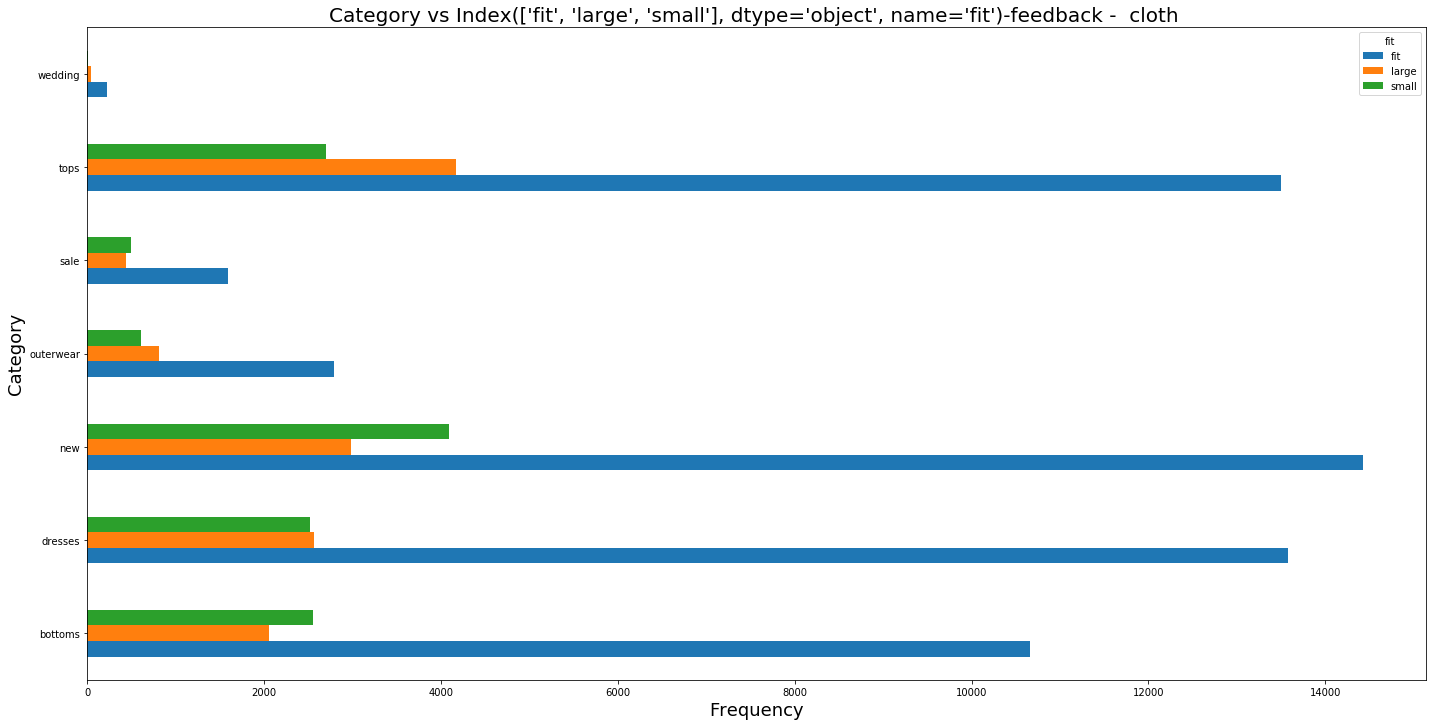

In [19]:
#plotting the category for fit

plot_barh(cat_fit, cat_fit.columns)

In [20]:
#Category vs Length
#Here, we will visualize how the items of different length fared in terms of - fit. This will tell us which categories need more attention! 
cat_len = g_by_category['length'].value_counts()

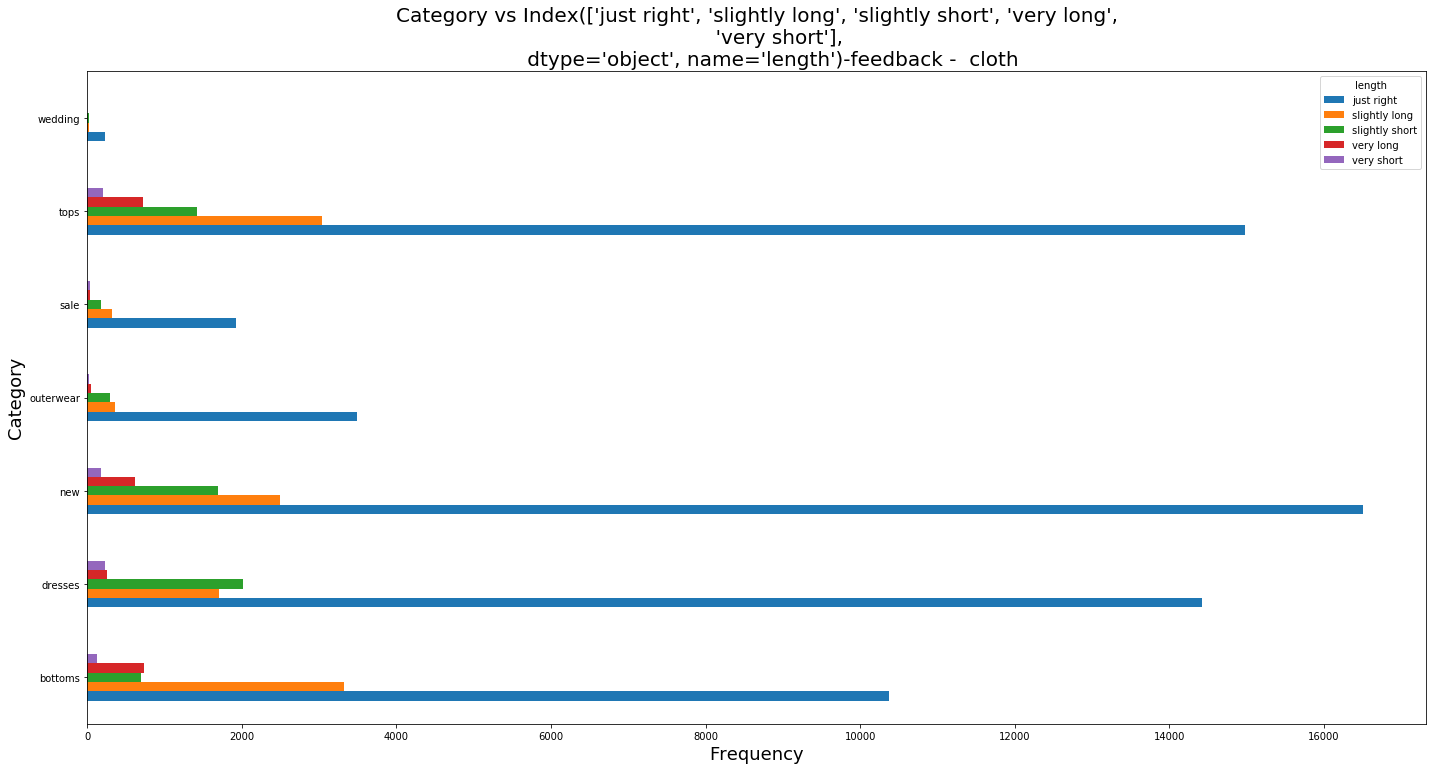

In [21]:
#unstacking and plotting the category for fit
cat_len = cat_len.unstack()

plot_barh(cat_len, cat_len.columns)

In [22]:
#Best length-fitting ('just right') belongs to tops, new, dresses and bottoms! (Also due to predominance of these categories in our total transactions- they make up almost 92% of our transactions!)
# All transactions share a similar order of reasons for return (in the order of importance), which is kind of intuitive as well:
# slightly long
# slightly short
# very long
# very short

In [23]:
# from the dataset we observe that the length is in feet, which needs to be converted to numerical value so that it can be passed 
# through the model. We will convert length in feet to cms. Below is the function to do the same.
#Convert feet to centimeters
def get_cms(x):
    try:
        if (len(x) > 3) :
            return int(x[0])*30.48 + int(x[4:-2])*2.54
        elif (len(x) > 1) :
            return int(x[0])*30.48
    except:
        return x

X_train.height = X_train.height.apply(get_cms)
X_test.height = X_test.height.apply(get_cms)

In [24]:
# verify the converion has been done
print(X_train.height.head())
print(X_test.height.head())

8540     172.72
30834    165.10
6095     170.18
14462    152.40
37896    165.10
Name: height, dtype: float64
36962    167.64
24517    162.56
46688    182.88
14851    175.26
8526     157.48
Name: height, dtype: float64


In [25]:
#missing value imputation
# checking for remaining missing values
print(X_train.isna().sum())
print(X_test.isna().sum())

bra_size     3986
category        0
cup_size     4150
height        728
hips        17878
item_id         0
length         26
quality        44
size            0
user_id         0
dtype: int64
bra_size    2032
category       0
cup_size    2105
height       379
hips        8848
item_id        0
length         9
quality       24
size           0
user_id        0
dtype: int64


In [26]:
#Dealing with the missing value is very important. If the feature is having less number of missing value we will 
#remove the row which contain missing value. Also we are going to fill the null value of the numerical variable with 
#mean and replace the categorical missing values with mode.

In [27]:
# removing rows for columns with very less number of missing values
X_train.dropna(axis=0,how='any',subset=['height','length','quality'], inplace=True)
X_test.dropna(axis=0, how='any',subset=['height','length','quality'], inplace=True)

In [28]:
# to be consistent in the records , index of only those should be present in labels for which records are there in the features
# drop the index from y_train which is not contained in X_train and similarly for y_test
y_train = y_train[y_train.index.isin(idx for idx in X_train.index)]
y_test = y_test[y_test.index.isin(idx for idx in X_test.index)]

In [29]:
X_train.isna().sum()

bra_size     3695
category        0
cup_size     3856
height          0
hips        17270
item_id         0
length          0
quality         0
size            0
user_id         0
dtype: int64

In [30]:
# we see that columns bra_size and hips have numerical values and we will use Imputer from sklearn to fill those

In [31]:
# importing the Imputer 
from sklearn.preprocessing import Imputer

In [32]:
# we will impute these missing numerical values by mean
mean_imputer = Imputer(strategy = 'mean')

# we fit and transform the train data , while we only transform the test data. Imputer should not be fitted upon by test data
X_train[['bra_size']] = mean_imputer.fit_transform(X_train[['bra_size']])
X_test[['bra_size']] = mean_imputer.transform(X_test[['bra_size']])

# we fit and transform the train data , while we only transform the test data. Imputer should not be fitted upon by test data
X_train[['hips']] = mean_imputer.fit_transform(X_train[['hips']])
X_test[['hips']] = mean_imputer.transform(X_test[['hips']])

In [33]:
# from the analysis we know that cup size has categorical values, we need to fill the missing value in categorical features with
# the most frequent i.e mode 

In [34]:
# checking the frequency distribution for feature cup_size

print(X_train['cup_size'].value_counts(normalize=True))
print(X_test['cup_size'].value_counts(normalize=True))

c         0.241731
d         0.211195
b         0.192287
dd/e      0.162499
ddd/f     0.079193
a         0.061407
dddd/g    0.026680
h         0.013694
aa        0.003817
k         0.002656
j         0.002499
i         0.002341
Name: cup_size, dtype: float64
c         0.239197
d         0.210294
b         0.190652
dd/e      0.165638
ddd/f     0.080293
a         0.064098
dddd/g    0.025014
h         0.013389
aa        0.004049
j         0.002846
i         0.002445
k         0.002085
Name: cup_size, dtype: float64


In [35]:
#find mode of cup size for train and test set 

mode_1 = X_train['cup_size'].mode()[0]
mode_2 = X_test['cup_size'].mode()[0]

In [36]:
# fill the NaN values with mode on train and test set

X_train['cup_size'].fillna(value=mode_1, inplace=True)
X_test['cup_size'].fillna(value=mode_2 , inplace = True)

In [37]:
# verifying whether the above manipulations have resulted in zero null values

print(X_train.isna().sum())
print(X_test.isna().sum())

bra_size    0
category    0
cup_size    0
height      0
hips        0
item_id     0
length      0
quality     0
size        0
user_id     0
dtype: int64
bra_size    0
category    0
cup_size    0
height      0
hips        0
item_id     0
length      0
quality     0
size        0
user_id     0
dtype: int64


In [38]:
# In the nex step , we are going to convert the categorical features to numerical one(one that the algorithm understands) using 
# one-hot encoding method 

In [39]:
#You can see that some of the features of category, cup_size and length in the data are textual in nature but any prediction model only work well in the numerical data so we need to convert that features into the numerical format.
print(X_train.head())
print(X_test.head())

       bra_size category cup_size  height       hips  item_id         length  \
8540       32.0  dresses        b  172.72  38.000000   160625  slightly long   
30834      34.0      new        b  165.10  35.000000   407044     just right   
6095       36.0      new        d  170.18  45.000000   152513     just right   
14462      32.0  dresses        d  152.40  37.000000   171740     just right   
37896      42.0      new        c  165.10  40.364358   416942     just right   

       quality  size  user_id  
8540       5.0     3   276443  
30834      2.0     8   980141  
6095       2.0    15   682176  
14462      4.0     7   459825  
37896      4.0    26   151852  
       bra_size category cup_size  height       hips  item_id      length  \
36962      34.0      new        c  167.64  35.000000   416738  just right   
24517      36.0  dresses        b  162.56  34.000000   391519  just right   
46688      44.0     tops        b  182.88  53.000000   503595  just right   
14851      36.0  dr

In [40]:
# Using the get_dummies function of pandas we can convert the categorical variables to one-hot coded columns,
# the drop_first=True, removes the original columns

X_train = pd.get_dummies(X_train,columns = ['category','cup_size','length'], drop_first= True)
X_test = pd.get_dummies(X_test, columns=['category','cup_size','length'], drop_first = True)

In [41]:
# to verify the columns have been one-hot encoded

print(X_train.head())
print(X_test.head())

       bra_size  height       hips  item_id  quality  size  user_id  \
8540       32.0  172.72  38.000000   160625      5.0     3   276443   
30834      34.0  165.10  35.000000   407044      2.0     8   980141   
6095       36.0  170.18  45.000000   152513      2.0    15   682176   
14462      32.0  152.40  37.000000   171740      4.0     7   459825   
37896      42.0  165.10  40.364358   416942      4.0    26   151852   

       category_dresses  category_new  category_outerwear        ...          \
8540                  1             0                   0        ...           
30834                 0             1                   0        ...           
6095                  0             1                   0        ...           
14462                 1             0                   0        ...           
37896                 0             1                   0        ...           

       cup_size_ddd/f  cup_size_dddd/g  cup_size_h  cup_size_i  cup_size_j  \
8540          

In [42]:
# Now , the data is cleaned and pre-processing done . We will now move to the next step, the easy one.
# Here we will build the model and actually do the prediction of Customer Satisfaction using Decision Tree Classifier 

In [43]:
# importing the necessary libraries to build the Decision Tree Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score

In [44]:
# initialize the decisiontreeclassifier, define a random state to replicate the results

model = DecisionTreeClassifier(random_state=6)

In [45]:
# fit the model to train data
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=6,
            splitter='best')

In [46]:
# predict the output 
y_pred = model.predict(X_test)

In [47]:
# calculate the accuracy score 
score = accuracy_score(y_pred, y_test)
print(score)

0.5795340541745625


In [48]:
# The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
#The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
# The best value is 1 and the worst value is 0.

precision = precision_score(y_test, y_pred, average= None)
#If None in average , the scores for each class are returned.
print(precision)

[0.72922923 0.28708454 0.26910971]


In [49]:
# Now We will select best model by cross-validation using Grid Search. We will not allow the tree to grow infinite and prune the
# tree, also defining the min sample leaf after which no splitting will take place. This would help in avoiding over fitting . 
# As we seen above , the model gives poor accuracy for test data, a major cause for it is overfitting. In Overfitting , 
# the model performs well on train data but performs very poor on unseen data(test data). To avoid this, we prune the tree

In [50]:
# importing Gridsearchcv from sklearn

from sklearn.model_selection import GridSearchCV

In [51]:
# defining the parameters for grid search , here we are limiting the max depth of the tree and also defining the critierion for 
# splitting 
parameters = {'max_depth':[5,10],'criterion':['gini','entropy'],'min_samples_leaf':[0.5,1]}

In [52]:
# instantiate the model
model_2 = DecisionTreeClassifier(random_state=6)

In [53]:
# initialize the GridSearchCV
grid = GridSearchCV(estimator=model_2, param_grid= parameters)

In [54]:
# fit to training data
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=6,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
#predict the output
y_pred = grid.predict(X_test)

In [56]:
#calculate the accuracy score
score_2 = grid.score(X_test, y_test)
print(score_2)

0.6986957975699476


In [57]:
# as seen above , the accuracy of the model improves from a meagre 58% to 70% by controlling the tree from growing unlimited. 
# So we need to check the growth of DecisonTree and avoid overfitting to get a better model.
# We can furthur increase the accuracy by varying the minimum sample leaf and max depth